In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from itertools import chain
import itertools
from collections import Counter
import time

In [2]:
%ls data

 Volume in drive C has no label.
 Volume Serial Number is 9A20-DCF1

 Directory of C:\Users\INTEL\Desktop\BnB\data

01/06/2021  08:39 PM    <DIR>          .
01/06/2021  08:39 PM    <DIR>          ..
01/05/2021  03:55 PM         1,072,592 price_test.csv
01/05/2021  03:55 PM         2,166,092 price_train.csv
               2 File(s)      3,238,684 bytes
               2 Dir(s)   6,669,254,656 bytes free


In [3]:
df_train = pd.read_csv('data/price_train.csv')
test = pd.read_csv('data/price_test.csv')

In [4]:
test_id = test.id

In [5]:
print("Shape of training dataset {}".format(df_train.shape))
print("Shape of testing dataset {}".format(test.shape))

Shape of training dataset (3466, 25)
Shape of testing dataset (1734, 24)


In [6]:
df_train.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [7]:
columns = df_train.columns

In [8]:
numeric_features = []
categorical_features = []

In [9]:
def check_type(column_num, lookfor, df = df_train):
    columns = df.columns
    if lookfor == "$":
        pos = 0
    elif lookfor == "%":
        pos = -1
    print('looking into feature: {}'.format(columns[column_num]))
    try:
        types = [p[pos] for p in df[columns[column_num]]]
        unique = np.unique(types, return_counts = True)
        if unique[1][0] == df.shape[0] and unique[0][0] == lookfor:
            print("'{}' is the only type present in the columns".format(lookfor))
        else:
            if unique[0][1] == '0':
                print('Only type {} is present along with no symbol of {} in some examples'.format(lookfor, lookfor, lookfor))
            else:
                print("type other than '{}' is also present in the columns".format(lookfor))
        return types
    except TypeError:
        print('Wrong column number entered. Entered column number has "int" dtype. Enter column number having string dtype')

In [10]:
def column_string_to_int(column_num, lookfor, df = df_train):
    columns = df.columns
    if lookfor == "$":
        string = [p[1:] for p in df[columns[column_num]]]
    elif lookfor == "%":
        string = [p[:-1] for p in df[columns[column_num]]]

    column_int = []
    if lookfor == "$":
        for val in string:
            if int(val.split('.')[1]) != 0:
                print("pricings are in decimal place as well")
                break
            else:
                if len(val.split('.')[0])<=3:
                    column_int.append(int(val.split('.')[0]))
                else:
                    column_int.append(int(re.sub(',', '', val.split('.')[0])))
    elif lookfor == '%':
        for val in string:
            column_int.append(int(val))
    return pd.Series(column_int)

In [11]:
def scatter_plot(x, y, ax = None, show = True):
    sns.scatterplot(x = x, y = y, ax = ax)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    if show:
        plt.show()

In [12]:
def kde_plot(culumn_num, df = df_train):
    columns = df.columns
    sns.kdeplot(df[columns[culumn_num]])
    plt.title(columns[culumn_num])
    plt.show()

In [13]:
def scatter_kde_plot(column_num, df = df_train):
    columns = df.columns
    _, ax = plt.subplots(1,2, figsize = (15,5))
    sns.scatterplot(x = df.price, y = df[columns[column_num]], ax = ax[0])
    ax[0].set_xlabel(df.price.name)
    ax[0].set_ylabel(df[columns[column_num]].name)
    sns.kdeplot(df[columns[column_num]], ax = ax[1])
    ax[1].set_title(columns[column_num])
    plt.show

In [14]:
def count_kde_plot(column_num, df = df_train, uptill = 99999):
    columns = df.columns
    _, ax = plt.subplots(1,2, figsize = (15,5))
    sns.countplot(y = columns[column_num], data = df, ax=ax[0])

    for value in df[columns[column_num]].value_counts().index[:uptill]:
        sns.kdeplot(df[df[columns[column_num]] == value].price, label = value, ax = ax[1])
    plt.legend()
    plt.title(columns[column_num])
    plt.show()

# EDA

### Price

In [15]:
_ = check_type(-1, '$')

looking into feature: price
'$' is the only type present in the columns


In [16]:
df_train['price_int'] = column_string_to_int(-1, '$')

In [17]:
df_train[['price', 'price_int']]

,price,price_int
0,$279.00,279
1,$99.00,99
2,$75.00,75
3,$70.00,70
4,$242.00,242
...,...,...
3461,$350.00,350
3462,$30.00,30
3463,$30.00,30
3464,$95.00,95


In [18]:
df_train['price'] = df_train['price_int']
df_train.drop('price_int', axis = 1, inplace = True)

In [19]:
print("Prices range from ${} to ${}.".format(min(df_train.price), max(df_train.price)))

Prices range from $0 to $1650.


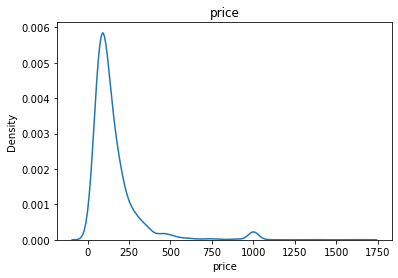

In [20]:
kde_plot(-1)

In [21]:
df_train.columns

Index(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy', 'price'],
      dtype='object')

In [22]:
df_train.isna().sum()

X1                              0
id                              0
host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
price                           0
dtype: int64

In [23]:
len(df_train.X1.unique())

3466

In [24]:
len(df_train.id.unique())

3466

### host_is_superhost

host_is_superhost


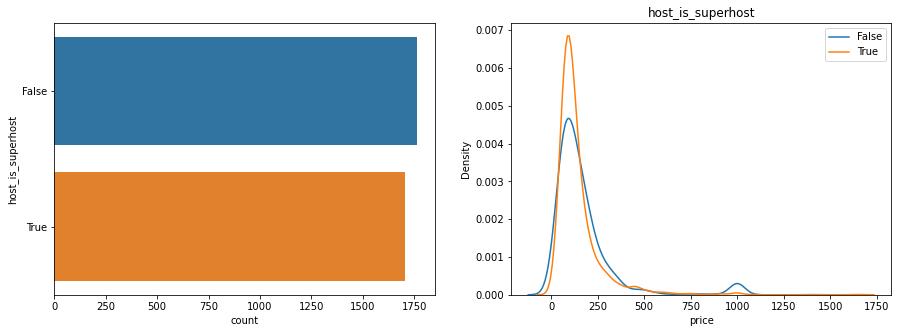

In [25]:
column_num = 2
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`host_is_superhost` doesn't affect much on the pricing, although people seem to choose a host who is superhost, but that is not we are predicting in this notebook**

### host_response_rate

In [26]:
column_num = 2
print(columns[column_num])
_ = check_type(3, '%')
_ = check_type(3, '%', df = test)

host_is_superhost
looking into feature: host_response_rate
'%' is the only type present in the columns
looking into feature: host_response_rate
'%' is the only type present in the columns


In [27]:
df_train['host_response_rate_int'] = column_string_to_int(3, '%')
test['host_response_rate_int'] = column_string_to_int(3, '%', df = test)

In [28]:
df_train[['host_response_rate', 'host_response_rate_int']]

,host_response_rate,host_response_rate_int
0,99%,99
1,100%,100
2,100%,100
3,90%,90
4,100%,100
...,...,...
3461,99%,99
3462,100%,100
3463,100%,100
3464,100%,100


In [29]:
df_train['host_response_rate'] = df_train['host_response_rate_int']
df_train.drop('host_response_rate_int', axis = 1, inplace = True)

test['host_response_rate'] = test['host_response_rate_int']
test.drop('host_response_rate_int', axis = 1, inplace = True)

In [30]:
df_train['host_response_rate'].value_counts(normalize = True)

100    0.811598
99     0.091748
92     0.011829
90     0.011252
98     0.011252
0      0.007501
97     0.005770
95     0.005193
50     0.004039
86     0.004039
96     0.004039
94     0.003751
80     0.003751
75     0.003462
67     0.002885
93     0.002308
85     0.002308
88     0.002308
83     0.002020
89     0.001443
78     0.001443
70     0.001443
91     0.000866
56     0.000866
60     0.000577
84     0.000577
40     0.000289
33     0.000289
62     0.000289
71     0.000289
57     0.000289
87     0.000289
Name: host_response_rate, dtype: float64

**`host_response_rate` is a continous variable whose 80% of values lies in 100% rate. Instead of letting this a continous variable it only made sense to make it a categorical column in 4 different range i.e., '0-49%', '50-89%', '90-99%', '100%'**

In [31]:
df_train.host_response_rate = pd.cut(df_train.host_response_rate, bins=[0, 50, 90, 99, 100], 
                                     labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

test.host_response_rate = pd.cut(test.host_response_rate, bins=[0, 50, 90, 99, 100], 
                                     labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

host_response_rate


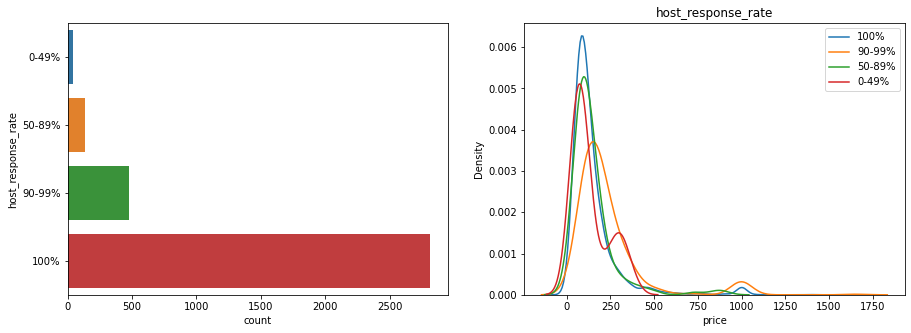

In [32]:
column_num = 3
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`host_response_rate` has influence on pricing as can be seen from the kde plot**

### host_response_time

host_response_time


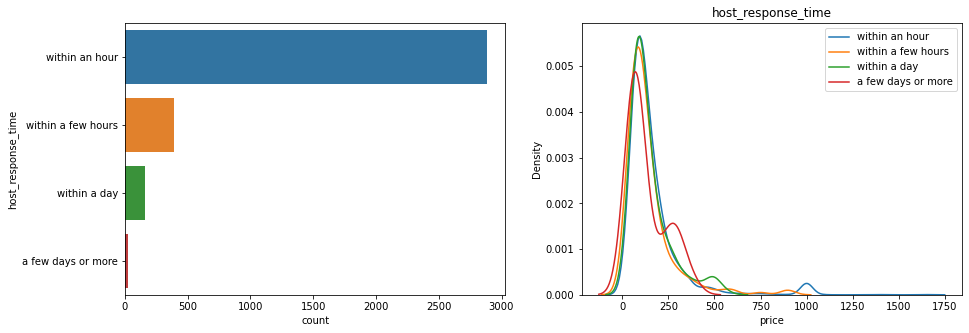

In [33]:
column_num = 4
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[4])

**`host_response_time` has influence on pricing as can be seen from the kde plot. More the response time taken by host less the price is**

### host_listings_count

host_listings_count


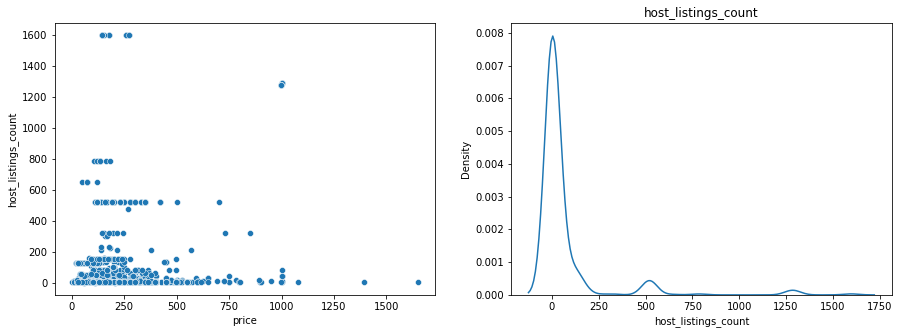

In [34]:
column_num = 5
print(columns[column_num])
scatter_kde_plot(column_num)
numeric_features.append(columns[column_num])

**`host_listings_count` doesn't affect much on the pricing**

### host_identity_verified

host_identity_verified


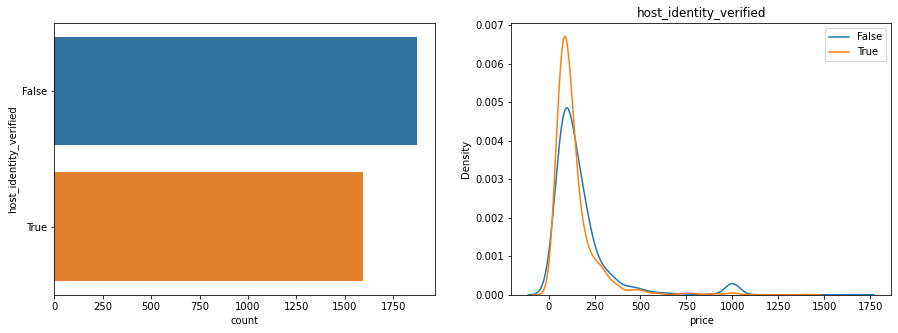

In [35]:
column_num = 6
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`host_identity_verified` has very slight influence on pricing as can be seen from the kde plot. People tend to prefer host who are verified**

### acommodates

accommodates


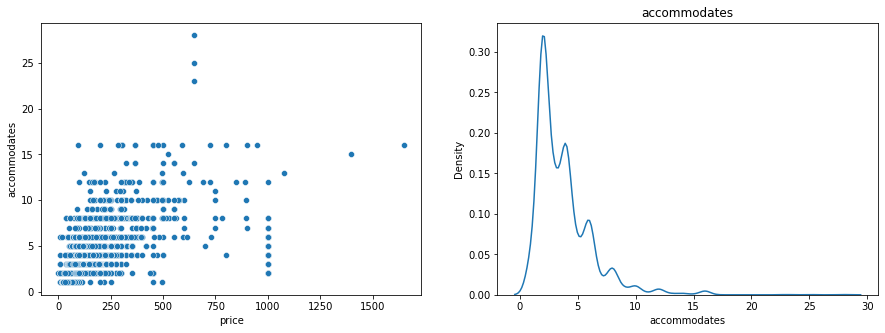

In [36]:
column_num = 7
print(columns[column_num])
scatter_kde_plot(column_num)

C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


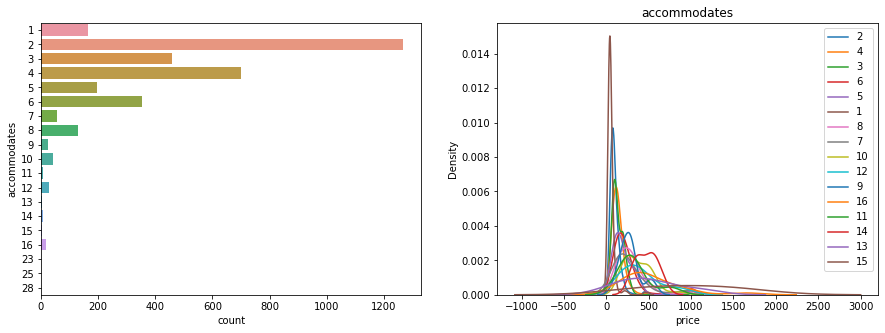

In [37]:
count_kde_plot(column_num)
numeric_features.append(columns[column_num])

**`accommodates` has a influence on pricing as can be seen from the kde and scatter plot. More the accomodation more the price**

### neighbourhood_group_cleaned

neighbourhood_group_cleansed


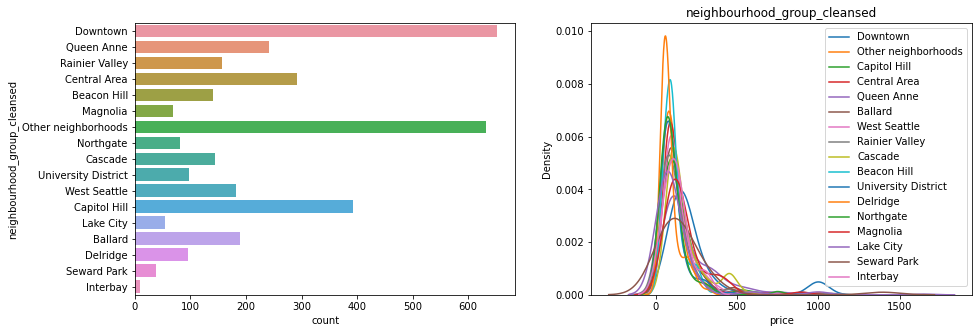

In [38]:
column_num = 8
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`neighbourhood_group_cleansed` has a influence on pricing but it's quite unclear from the messy kde plot on how exacly this feature affect but can be seen from the kde plot that for different values different mean is observed**

### property_type

In [39]:
column_num = 9
print(columns[column_num])

df_train[columns[column_num]].replace({'Townhouse': 'House', 'Serviced apartment': 'Apartment', 'Loft': 'Apartment', 
                              'Bungalow': 'House', 'Cottage': 'House', 'Villa': 'House', 'Tiny house': 'House', 
                              'Earth house': 'House', 'Chalet': 'House'}, inplace=True)
df_train.loc[~df_train.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

test[columns[column_num]].replace({'Townhouse': 'House', 'Serviced apartment': 'Apartment', 'Loft': 'Apartment', 
                              'Bungalow': 'House', 'Cottage': 'House', 'Villa': 'House', 'Tiny house': 'House', 
                              'Earth house': 'House', 'Chalet': 'House'}, inplace=True)
test.loc[~test.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

property_type


**`property_type` had many values which meant same thing more or less hence we converted all the values in majorly 3 values, Apartment. House and Others**

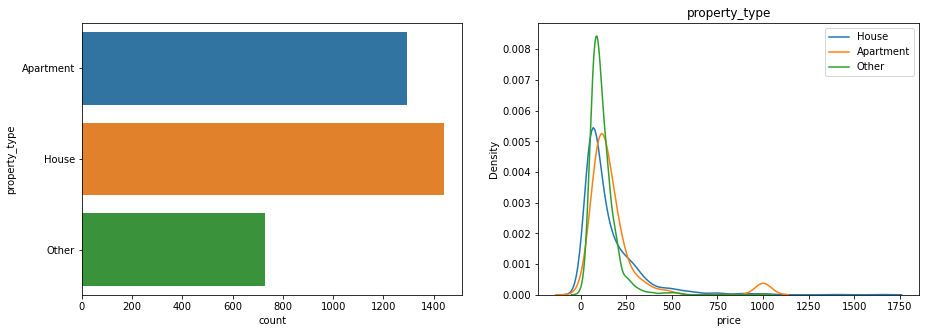

In [40]:
count_kde_plot(column_num, uptill = 10)
categorical_features.append(columns[column_num])

**`property_type` has a slight influence on pricing. Apartment is charged at higher prices while houses at lower price**

### room_type

room_type


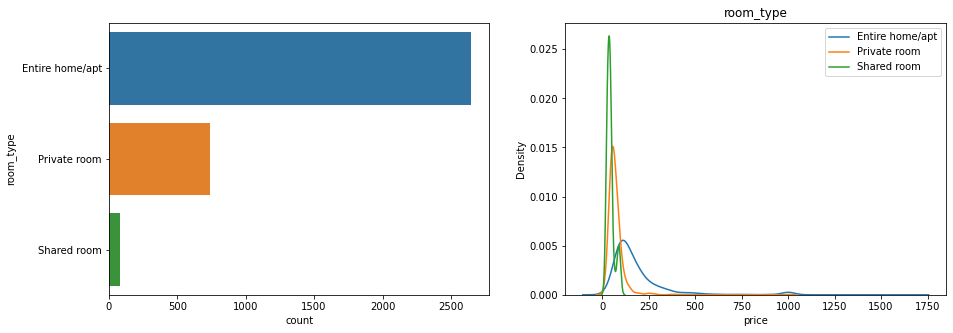

In [41]:
column_num = 10
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`room_type` has quite an influence on pricing. Shared rooms have lower pricing, private rooms have moderate pricing while Entire home/apt have higher pricing**

### latitude & longitude

latitude
longitude


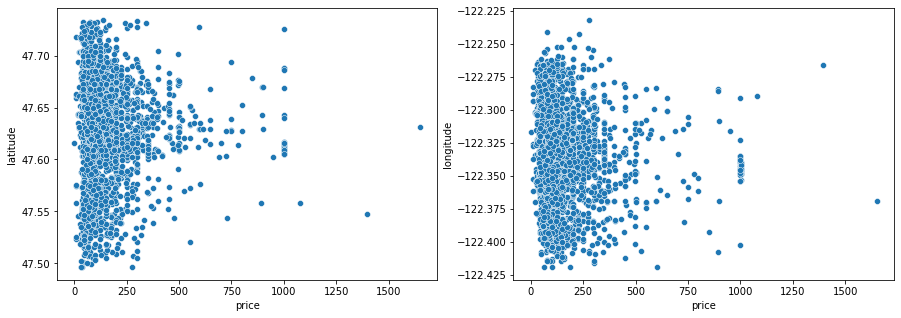

In [42]:
column_num = 11
print(columns[column_num])
_, ax = plt.subplots(1,2, figsize = (15,5))
scatter_plot(df_train.price, df_train[columns[11]], ax = ax[0], show = False)
numeric_features.append(columns[column_num])

column_num = 12
print(columns[column_num])
scatter_plot(df_train.price, df_train[columns[12]], ax = ax[1], show = False)
plt.show()
numeric_features.append(columns[column_num])

### guest_included

guests_included


C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\INTEL\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


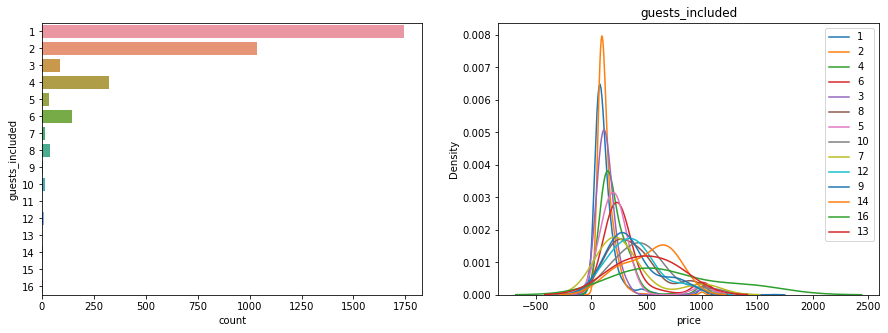

In [43]:
column_num = 13
print(columns[column_num])
count_kde_plot(column_num)
numeric_features.append(columns[column_num])

**`guests_included` has quite an influence on pricing. more the guest more is the  pricing**

### bathrooms

bathrooms


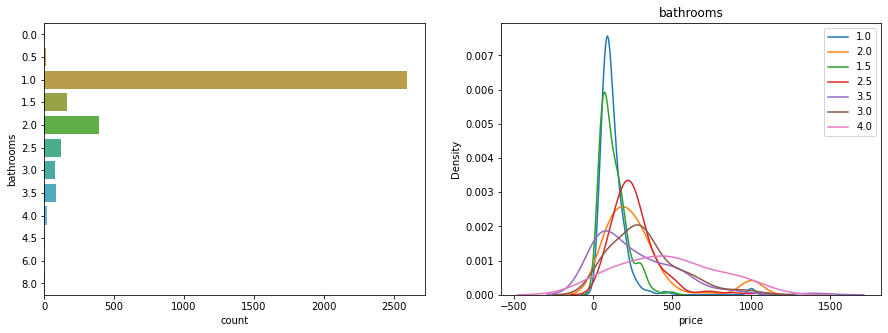

In [44]:
column_num = 14
print(columns[column_num])
count_kde_plot(column_num, uptill = 7)
numeric_features.append(columns[column_num])

**`bathrooms` has quite an influence on pricing. more the bathroom more is the  pricing**

### bedrooms

bedrooms


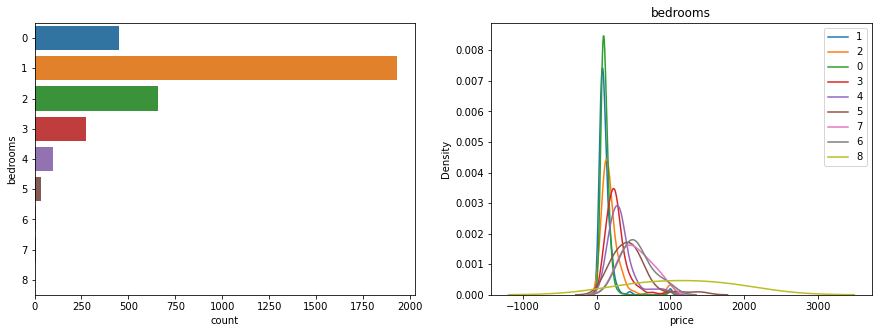

In [45]:
column_num = 15
print(columns[column_num])
count_kde_plot(column_num)
numeric_features.append(columns[column_num])

**`bedrooms` has quite an influence on pricing. more the bedrooms more is the  pricing**

### beds

beds


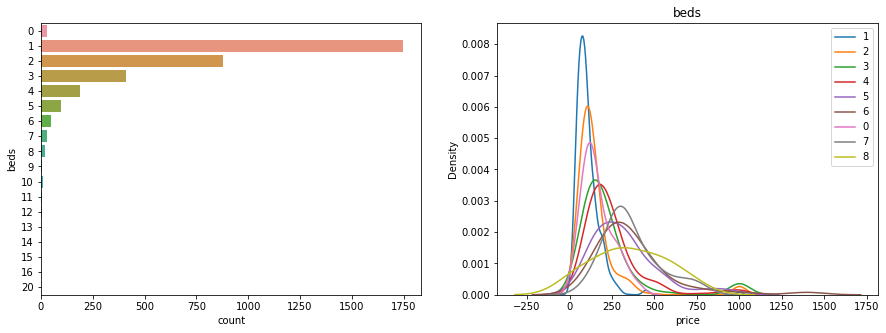

In [46]:
column_num = 16
print(columns[column_num])
count_kde_plot(column_num, uptill = 9)
numeric_features.append(columns[column_num])

**`bed` has quite an influence on pricing. more the bed more is the  pricing**

### bed_type

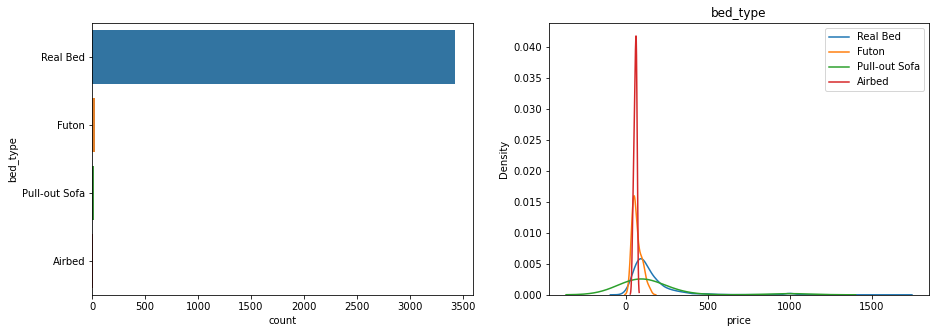

bed_type


In [47]:
count_kde_plot(17)
column_num = 17
print(columns[column_num])

In [48]:
df_train.drop('bed_type', axis = 1, inplace = True)
test.drop('bed_type', axis = 1, inplace = True)

**`bed_type` majorly consistst of 99% of real bed, henceit won't add much of an information for prediction in pricing, hence we have dropped it**

In [49]:
columns = df_train.columns

### Amenities

In [50]:
def get_separate_amenities_for_each_exapmple(column_num, df = df_train):
    amenities = []
    columns = df.columns
    for row in df[columns[column_num]]:
        row_replaced = row.replace('Wide clearance to shower, toilet', 'Wide clearance to shower and toilet')
        tok_list = re.sub(r'[\"]', '', row_replaced)[1:-1].split(',')
        tok_list_recons = []
        for tok in tok_list:
            if tok.strip() != '':
                tok_list_recons.append(tok)
        amenities.append(tok_list_recons)
    return amenities

In [51]:
column_num = 17
print(columns[column_num])
amenities = get_separate_amenities_for_each_exapmple(column_num, df = df_train)
amenities_test = get_separate_amenities_for_each_exapmple(column_num, df = test)

amenities


In [52]:
df_train_amenities = amenities
test_amenities = amenities_test

In [53]:
unique_amenities = set(chain(*amenities))
unique_amenities_test = set(chain(*amenities_test))

In [54]:
all_amenities = list(itertools.chain(*amenities))
all_amenities_test = list(itertools.chain(*amenities_test))

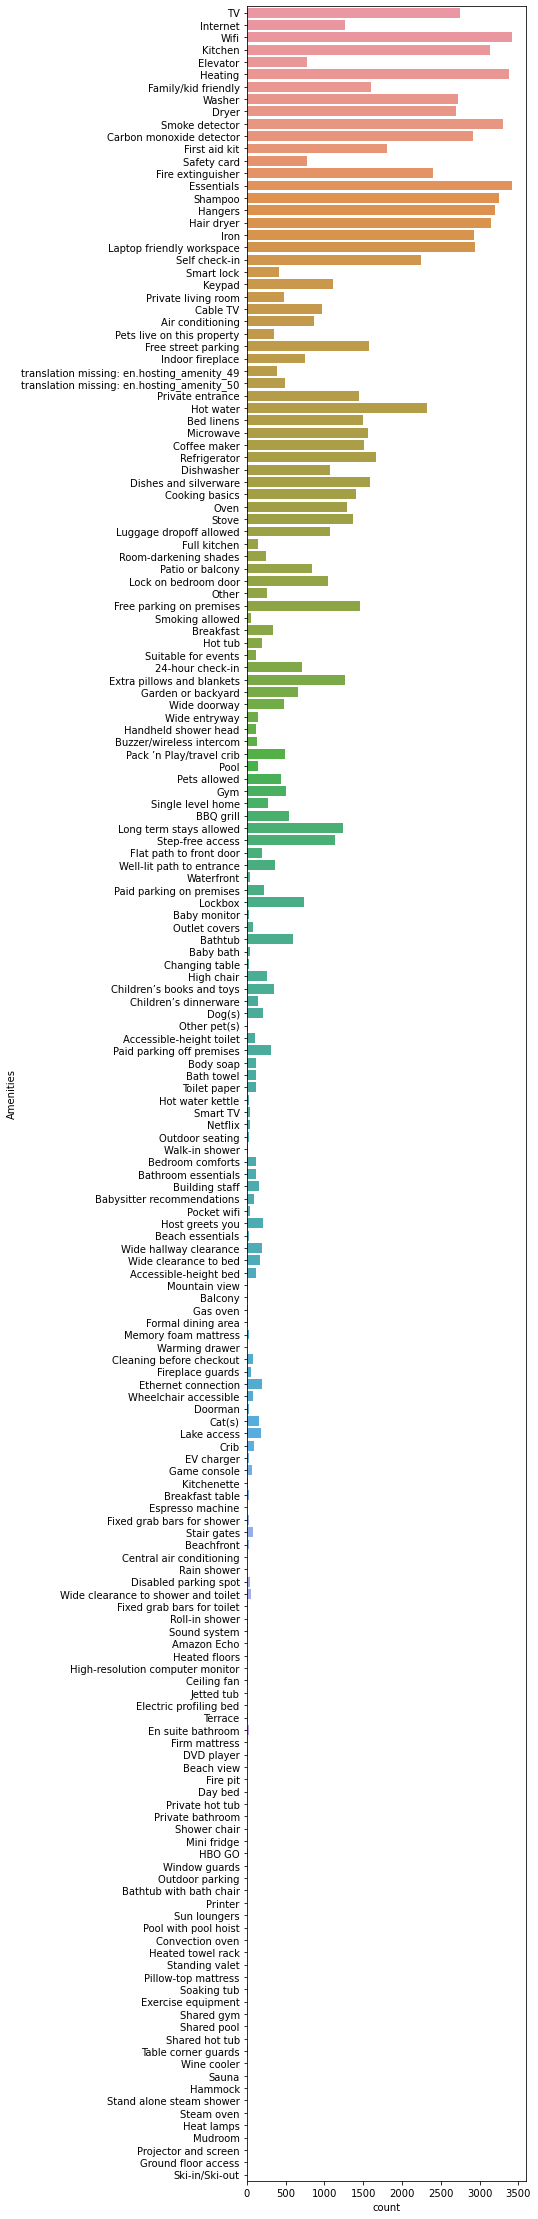

In [55]:
plt.figure(figsize = (5, 40))
sns.countplot(y = all_amenities)
plt.ylabel('Amenities')
plt.show()

categorical_features.append(columns[column_num])

**`amenities` have total 176 unique values which we will use it to make a sparse matrix**

### cleaning_fee

In [56]:
column_num = 18
print(columns[column_num])
_ = check_type(column_num, '$')
_ = check_type(column_num, '$', df = test)

cleaning_fee
looking into feature: cleaning_fee
Only type $ is present along with no symbol of $ in some examples
looking into feature: cleaning_fee
Only type $ is present along with no symbol of $ in some examples


In [57]:
def add_dollar_sign(df):
    clean_fee = []
    for val in df.cleaning_fee:
        if val[0] == '$':
            clean_fee.append(val)
        elif val[0] == '0':
            clean_fee.append('$' + val + '.00')
    return pd.Series(clean_fee)

In [58]:
df_train['cleaning_fee_new'] = add_dollar_sign(df_train)
test['cleaning_fee_new'] = add_dollar_sign(test)

In [59]:
df_train[['cleaning_fee', 'cleaning_fee_new']]

,cleaning_fee,cleaning_fee_new
0,$129.00,$129.00
1,$50.00,$50.00
2,$25.00,$25.00
3,$0.00,$0.00
4,$99.00,$99.00
...,...,...
3461,$129.00,$129.00
3462,$15.00,$15.00
3463,$22.00,$22.00
3464,$25.00,$25.00


In [60]:
df_train['cleaning_fee'] = df_train['cleaning_fee_new']
df_train.drop('cleaning_fee_new', axis = 1, inplace = True)

test['cleaning_fee'] = test['cleaning_fee_new']
test.drop('cleaning_fee_new', axis = 1, inplace = True)

In [61]:
df_train['cleaning_fee_new'] = column_string_to_int(column_num, '$')
test['cleaning_fee_new'] = column_string_to_int(column_num, '$', df = test)

In [62]:
df_train[['cleaning_fee', 'cleaning_fee_new']]

,cleaning_fee,cleaning_fee_new
0,$129.00,129
1,$50.00,50
2,$25.00,25
3,$0.00,0
4,$99.00,99
...,...,...
3461,$129.00,129
3462,$15.00,15
3463,$22.00,22
3464,$25.00,25


In [63]:
df_train['cleaning_fee'] = df_train['cleaning_fee_new']
df_train.drop('cleaning_fee_new', axis = 1, inplace = True)

test['cleaning_fee'] = test['cleaning_fee_new']
test.drop('cleaning_fee_new', axis = 1, inplace = True)

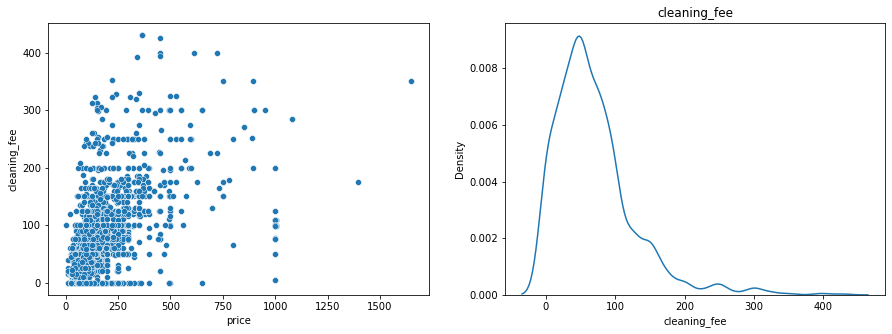

In [64]:
scatter_kde_plot(column_num)
numeric_features.append(columns[column_num])

**`cleaning_fee` has an influence on pricing as can be seen from scatter plot. More the cleaning fee more the pricing**

### minimum_nights

minimum_nights


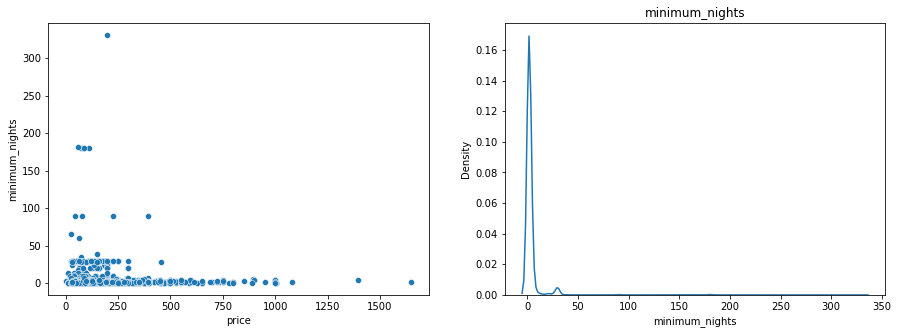

In [65]:
column_num = 19
print(columns[column_num])
scatter_kde_plot(column_num)

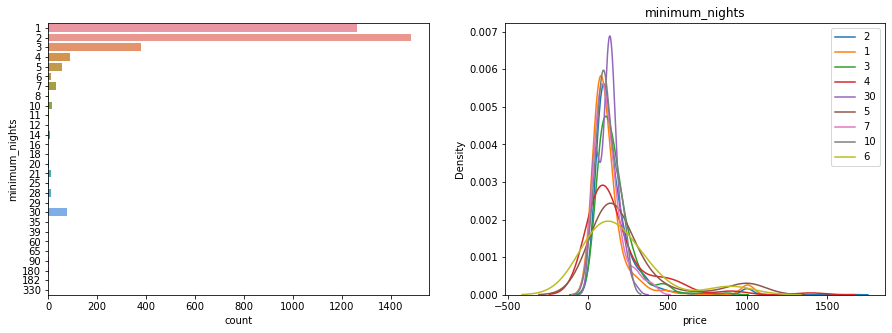

In [66]:
count_kde_plot(column_num, uptill = 9)
numeric_features.append(columns[column_num])

**`minimum_nights` has no or very little influence on pricing as can be seen from scatter and kde plot**

### maximum_nights

maximum_nights


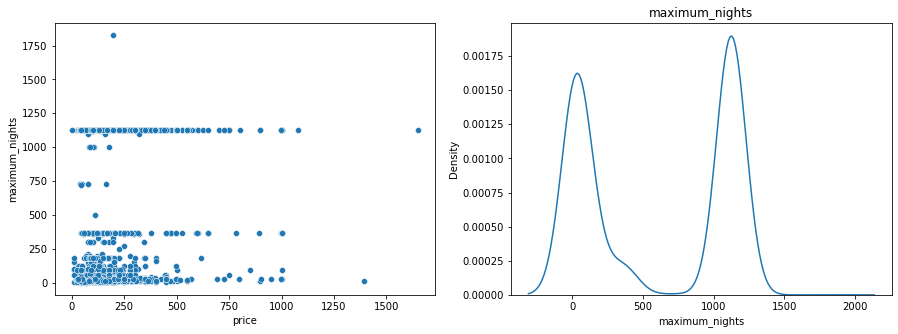

In [67]:
column_num = 20
print(columns[column_num])
scatter_kde_plot(column_num)
numeric_features.append(columns[column_num])

**`maximum_nights` has no or very little influence on pricing as can be seen from scatter and kde plot**

### instant_bookable

instant_bookable


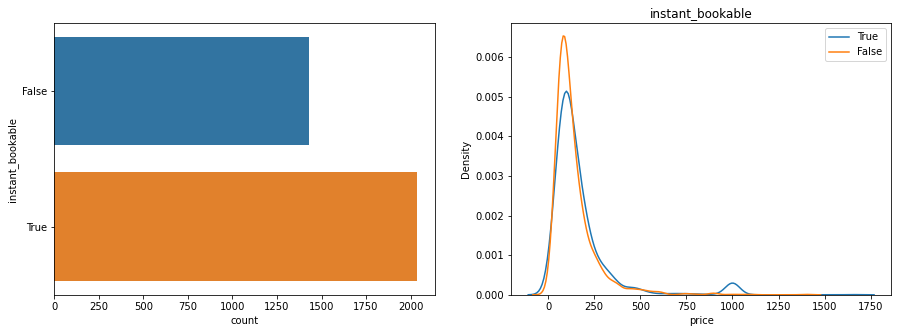

In [68]:
column_num = 21
print(columns[column_num])
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`instant_bookable` has an influence on pricing as can be seen from kde plot. If the booking is instant pricing is high**

### cancellation_policy

In [69]:
column_num = 22
print(columns[column_num])

df_train[columns[column_num]].replace({'super_strict_30': 'strict', 'super_strict_60': 'strict', 
                               'strict_14_with_grace_period': 'strict'}, inplace=True)

test[columns[column_num]].replace({'super_strict_30': 'strict', 'super_strict_60': 'strict', 
                               'strict_14_with_grace_period': 'strict'}, inplace=True)

cancellation_policy


**`cancellation_policy` had many similar values which didn't add much value to data hence converted this column into manly 3 values i.e., strict, moderate and flexible**

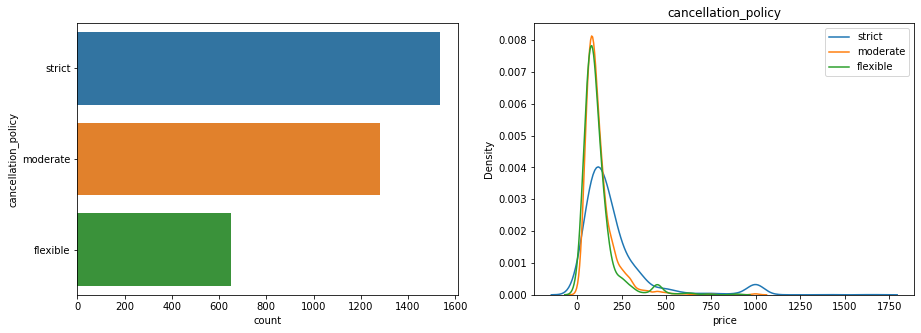

In [70]:
count_kde_plot(column_num)
categorical_features.append(columns[column_num])

**`cancellation_policy` had influence on pricing. More strict the policy more high the price**

# Data Engineering

In [71]:
df_train.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,90-99%,within an hour,521,False,5,Downtown,Apartment,...,2.0,2,2,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129,2,1125,True,strict,279
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,1.0,0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50,2,30,True,moderate,99
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Other,...,1.0,1,2,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25,2,28,False,moderate,75
3,776,3946674,True,50-89%,within a few hours,1,True,2,Central Area,House,...,1.0,1,1,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0,2,30,False,flexible,70
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,2.5,3,3,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99,2,12,False,flexible,242


In [72]:
df_train = df_train[columns[2:]]
test = test[columns[2:-1]]

In [73]:
df_train.head()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,...,bathrooms,bedrooms,beds,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,False,90-99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,...,2.0,2,2,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",129,2,1125,True,strict,279
1,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,...,1.0,0,1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",50,2,30,True,moderate,99
2,True,100%,within an hour,1,False,4,Rainier Valley,Other,Entire home/apt,47.549007,...,1.0,1,2,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",25,2,28,False,moderate,75
3,True,50-89%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,...,1.0,1,1,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0,2,30,False,flexible,70
4,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,...,2.5,3,3,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",99,2,12,False,flexible,242


In [74]:
df_train.describe()

,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,price
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000,3466.000000,3466.000000
mean,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,69.577611,3.328621,595.884305,159.038950
std,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,58.357637,10.540059,530.773958,158.735786
min,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,30.000000,1.000000,30.000000,79.000000
50%,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,60.000000,2.000000,365.000000,115.000000
75%,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,90.000000,2.000000,1125.000000,180.000000
max,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,430.000000,330.000000,1825.000000,1650.000000


In [75]:
print("Numerical Features in data:\n\n\t{}".format(numeric_features))

Numerical Features in data:

	['host_listings_count', 'accommodates', 'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'minimum_nights', 'maximum_nights']


In [76]:
print("Categorical Features in data:\n\n\t{}".format(categorical_features))

Categorical Features in data:

	['host_is_superhost', 'host_response_rate', 'host_response_time', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'amenities', 'instant_bookable', 'cancellation_policy']


In [77]:
try:
    assert len(numeric_features) + len(categorical_features) + 1 == df_train.shape[1]
except AssertionError:
    print(len(numeric_features) + len(categorical_features) + 1)
try:
    assert set(numeric_features + categorical_features + ['price']).difference(set(df_train.columns)) == set()
except AssertionError:
    print(set(numeric_features + categorical_features + ['price']).difference(set(df_train.columns)))

In [78]:
df_train[numeric_features].head()

,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights
0,521,5,47.612163,-122.338239,4,2.0,2,2,129,2,1125
1,1,2,47.640827,-122.355248,1,1.0,0,1,50,2,30
2,1,4,47.549007,-122.273951,2,1.0,1,2,25,2,28
3,1,2,47.601922,-122.307979,1,1.0,1,1,0,2,30
4,4,8,47.552311,-122.293409,6,2.5,3,3,99,2,12


In [79]:
df_train[categorical_features].head()

,host_is_superhost,host_response_rate,host_response_time,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,amenities,instant_bookable,cancellation_policy
0,False,90-99%,within an hour,False,Downtown,Apartment,Entire home/apt,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",True,strict
1,True,100%,within an hour,True,Queen Anne,House,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",True,moderate
2,True,100%,within an hour,False,Rainier Valley,Other,Entire home/apt,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",False,moderate
3,True,50-89%,within a few hours,True,Central Area,House,Private room,"{Internet,Wifi,Kitchen,""Pets live on this prop...",False,flexible
4,True,100%,within an hour,True,Beacon Hill,House,Entire home/apt,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",False,flexible


In [80]:
df_train_num = df_train[numeric_features]
df_train_cat = df_train[categorical_features]

test_num = test[numeric_features]
test_cat = test[categorical_features]

**Dividing the whole dataset to two different dataset one being numerical dataset another being categorical dataset, this is done becuse we well only be scaling numerical dataset to range of 0 and 1 further in this notebook**

### Categorical variables

In [81]:
#feature encoding
df_train_cat.host_is_superhost.replace({False: 0, True: 1}, inplace = True)
df_train_cat.host_identity_verified.replace({False: 0, True: 1}, inplace = True)
df_train_cat.instant_bookable.replace({False: 0, True: 1}, inplace = True)

test_cat.host_is_superhost.replace({False: 0, True: 1}, inplace = True)
test_cat.host_identity_verified.replace({False: 0, True: 1}, inplace = True)
test_cat.instant_bookable.replace({False: 0, True: 1}, inplace = True)

C:\Users\INTEL\Anaconda3\lib\site-packages\pandas\core\series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [82]:
df_train_cat.head()

,host_is_superhost,host_response_rate,host_response_time,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,amenities,instant_bookable,cancellation_policy
0,0,90-99%,within an hour,0,Downtown,Apartment,Entire home/apt,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",1,strict
1,1,100%,within an hour,1,Queen Anne,House,Entire home/apt,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1,moderate
2,1,100%,within an hour,0,Rainier Valley,Other,Entire home/apt,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",0,moderate
3,1,50-89%,within a few hours,1,Central Area,House,Private room,"{Internet,Wifi,Kitchen,""Pets live on this prop...",0,flexible
4,1,100%,within an hour,1,Beacon Hill,House,Entire home/apt,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",0,flexible


In [83]:
#crating one hod encoded variales for each of these features
host_response_rate_dummies = pd.get_dummies(df_train_cat.host_response_rate)
neighbourhood_group_cleansed_dummies = pd.get_dummies(df_train_cat.neighbourhood_group_cleansed)
property_type_dummies = pd.get_dummies(df_train_cat.property_type)
room_type_dummies = pd.get_dummies(df_train_cat.room_type)
host_response_time_dummies = pd.get_dummies(df_train_cat.host_response_time)
cancellation_policy_dummies = pd.get_dummies(df_train_cat.cancellation_policy)

host_response_rate_dummies_test = pd.get_dummies(test_cat.host_response_rate)
neighbourhood_group_cleansed_dummies_test = pd.get_dummies(test_cat.neighbourhood_group_cleansed)
property_type_dummies_test = pd.get_dummies(test_cat.property_type)
room_type_dummies_test = pd.get_dummies(test_cat.room_type)
host_response_time_dummies_test = pd.get_dummies(test_cat.host_response_time)
cancellation_policy_dummies_test = pd.get_dummies(test_cat.cancellation_policy)

In [84]:
#dropping those features for which we have already one hot encoded feature
df_train_cat.drop(['neighbourhood_group_cleansed', 
                   'property_type', 
                   'host_response_time', 
                   'room_type', 
                   'host_response_rate', 
                   'cancellation_policy'], 
                  axis = 1, inplace = True)

test_cat.drop(['neighbourhood_group_cleansed', 
               'property_type', 
               'host_response_time', 
               'room_type', 
               'host_response_rate', 
               'cancellation_policy'], 
              axis = 1, inplace = True)

C:\Users\INTEL\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
categorical_features_remaining = set(categorical_features) - set(['neighbourhood_group_cleansed', 
                                                                  'property_type', 
                                                                  'host_response_time', 
                                                                  'room_type', 
                                                                  'host_response_rate', 
                                                                  'cancellation_policy'])
categorical_features_remaining

{'amenities',
 'host_identity_verified',
 'host_is_superhost',
 'instant_bookable'}

In [86]:
len(df_train_amenities)

3466

In [87]:
len(all_amenities)

99521

In [88]:
print(len(unique_amenities))
print(len(unique_amenities_test))

176
170


**there are few amenities in test data which are not present in the training data which are in very less number as well hence will drop those amenities**

In [89]:
test_ammenities_not_in_train = []
for amm in unique_amenities_test:
    if amm not in unique_amenities:
        test_ammenities_not_in_train.append(amm)

In [90]:
test_ammenities_not_in_train

['Murphy bed', 'Alfresco bathtub', 'Private gym', 'Tennis court']

In [91]:
len(set(chain(*test_amenities)))

170

In [92]:
for amm in test_amenities:
    for item_remove in test_ammenities_not_in_train:
        if item_remove in amm:
            amm.remove(item_remove)

In [93]:
len(set(chain(*test_amenities)))

166

In [94]:
len(test_amenities)

1734

In [95]:
df_amenities = pd.DataFrame(columns=unique_amenities)
df_test_amenities = pd.DataFrame(columns=unique_amenities)

In [96]:
def create_df_of_ammeities(list_amenities, df):
    for index, row in enumerate(list_amenities):
        arr = []
        for ammenity in row:
            arr.append(ammenity == df.columns)
        df.loc[index] = np.sum(np.asarray(arr), axis = 0)
    return df

In [97]:
#hold on, this will take some time
df_amenities = create_df_of_ammeities(df_train_amenities, df_amenities)
df_test_amenities = create_df_of_ammeities(test_amenities, df_test_amenities)

In [98]:
print("Shape of amenities dataframe: {}".format(df_amenities.shape))
print("Shape of amenities dataframe: {}".format(df_test_amenities.shape))

Shape of amenities dataframe: (3466, 176)
Shape of amenities dataframe: (1734, 176)


In [99]:
assert df_amenities.loc[2012].sum() == len(df_train_amenities[2012])
assert df_amenities.loc[20].sum() == len(df_train_amenities[20])
assert df_amenities.loc[3000].sum() == len(df_train_amenities[3000])

assert df_amenities.loc[254][df_train_amenities[254][14]] == 1
assert df_amenities.loc[3465][df_train_amenities[3465][5]] == 1
assert df_amenities.loc[0][df_train_amenities[0][22]] == 1

assert (df_test_amenities.sum() == 0).sum() == 10

In [100]:
rare_amenities = []
for col in df_amenities.columns:
    if df_amenities[col].sum() < (df_amenities.shape[0]/100):
        rare_amenities.append(col)

In [101]:
df_amenities.drop(rare_amenities, axis = 1, inplace = True)
df_test_amenities.drop(rare_amenities, axis = 1, inplace = True)

In [102]:
df_train_cat.drop('amenities', axis = 1, inplace = True)
test_cat.drop('amenities', axis = 1, inplace = True)

C:\Users\INTEL\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
#merge all the dataset
df_train_cat = pd.concat([df_train_cat, host_response_rate_dummies, neighbourhood_group_cleansed_dummies, property_type_dummies, 
                      room_type_dummies, host_response_time_dummies, cancellation_policy_dummies, df_amenities], axis = 1)

test_cat = pd.concat([test_cat, host_response_rate_dummies_test, neighbourhood_group_cleansed_dummies_test, 
                      property_type_dummies_test, room_type_dummies_test, host_response_time_dummies_test, 
                      cancellation_policy_dummies_test, df_test_amenities], axis = 1)

### Numerical Variables

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()
scaler.fit(df_train_num)
df_train_num_scaled = pd.DataFrame(scaler.transform(df_train_num), columns = numeric_features)
test_num_scaled = pd.DataFrame(scaler.transform(test_num), columns = numeric_features)

### combining categorical variable with numerical variable

In [106]:
df_train_new = pd.concat([df_train_num_scaled, df_train_cat], axis = 1)
test_new = pd.concat([test_num_scaled, test_cat], axis = 1)

In [107]:
print("New shape of datset: {}".format(df_train_new.shape))
print("New shape of datset: {}".format(test_new.shape))

New shape of datset: (3466, 156)
New shape of datset: (1734, 156)


In [108]:
label = df_train.price

# Initial modelling

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df_train_new.values, label.values, test_size = 0.1, random_state = 42)

In [111]:
print('Shape of dataset:\n\tTraining Data: {}\n\tTraining Label: {}\n\n\tTesting Data: {}\n\tTesting Label {}'.format(
                                                                X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shape of dataset:
	Training Data: (3119, 156)
	Training Label: (3119,)

	Testing Data: (347, 156)
	Testing Label (347,)


### Linear Regression

In [116]:
def print_report(classifier, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):

    print("r2:\n\tTraining: {}\n\tTesting: {}".format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))
    print("Mean Absolute Error:\n\tTraining: {}\n\tTesting: {}".format(mean_absolute_error(y_train, classifier.predict(X_train)), 
                                                         mean_absolute_error(y_test, classifier.predict(X_test))))
    print("Mean Squaered Error:\n\tTraining: {}\n\tTesting: {}".format(mean_squared_error(y_train, classifier.predict(X_train)), 
                                                         mean_squared_error(y_test, classifier.predict(X_test))))

In [113]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
print_report(LR)

r2:
	Training: 0.6472252235535945
	Testing: 0.6935652432551508
Mean Absolute Error:
	Training: 58.593324182430266
	Testing: 59.21798451008645
Mean Squaered Error:
	Training: 8815.222903051985
	Testing: 8273.18245747591


**when starting to work on a new data, it's always a good idea to use a very simple model to see how complex is the data which you're using. this will give an idea and save lot of time in model selection. if the simpleset model gives good performance then for model selection you don't need a very complex model at all and vice versa. As can be see for a very simple the performance it about 70% (r2) which is good meaning the dataset which we're dealing with is not so complex in nature to learn**

### Random Forest

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 100, 150, 200, 250]}

In [117]:
RF = RandomForestRegressor()
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=10, random_state=42, n_jobs = -1)
RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [118]:
RF_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [119]:
RF = RandomForestRegressor(n_estimators = RF_random.best_params_['n_estimators'],
                                 min_samples_split = RF_random.best_params_['min_samples_split'],
                                 min_samples_leaf = RF_random.best_params_['min_samples_leaf'],
                                 max_features = RF_random.best_params_['max_features'],
                                 max_depth = RF_random.best_params_['max_depth'],
                                 bootstrap = RF_random.best_params_['bootstrap'])
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
print_report(RF)

r2:
	Training: 0.9533381003807934
	Testing: 0.8071282869124534
Mean Absolute Error:
	Training: 15.66941320092876
	Testing: 40.56321872796737
Mean Squaered Error:
	Training: 1165.9990273869082
	Testing: 5207.186319885491


**Random forest is an ensamble of decision tree which often tends to outperform complex models such as Neaural Network if the dataset size is small and as a matter of fact data size is quite small. Random forest provides high accuracy and less overfitting as compared to decision tree. Hence used this model. There is a 10% increase in accuracy of validation set as compared to linear regeression. We used randomised hyperparameter search to find most optimal hyperparameter**

### KNN

In [121]:
random_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               'n_neighbors': [1, 2, 4],
               'weights': ['uniform', 'distance'],
               'p': [1, 2,  3, 4]}

In [122]:
KNN = KNeighborsRegressor()
KNN_random = RandomizedSearchCV(estimator = KNN, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=10, random_state=42, n_jobs = -1)
KNN_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'n_neighbors': [1, 2, 4],
                                        'p': [1, 2, 3, 4],
                                        'weights': ['uniform', 'distance']},
                   pre_disp

In [123]:
KNN_random.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 30,
 'algorithm': 'brute'}

In [124]:
KNN = KNeighborsRegressor(algorithm=KNN_random.best_params_['algorithm'],
               leaf_size=KNN_random.best_params_['leaf_size'],
               n_neighbors=KNN_random.best_params_['n_neighbors'],
               weights=KNN_random.best_params_['weights'],
               p=KNN_random.best_params_['p'])
KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                    weights='distance')

In [125]:
print_report(KNN)

r2:
	Training: 1.0
	Testing: 0.5988912676054851
Mean Absolute Error:
	Training: 0.0
	Testing: 53.59737708212834
Mean Squaered Error:
	Training: 0.0
	Testing: 10829.208029916073


**The KNN algorithm uses 'feature similarity' to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. But unfortunately the performance of KNN model is very poor even after randomised cv search**

### XGB

In [113]:
from xgboost import XGBRegressor

In [127]:
random_grid = {'n_estimators': [50, 100, 150, 200, 250],
               'max_depth': [1, 2, 4, 6, 8, 10, 12, 14],
               'booster': ['gbtree', 'gblinear', 'dart'],
               'gamma': [0, 1, 2, 3],
               'reg_lambda': [0.1, 1, 10],
              'reg_alpha': [0.1, 1, 10]}

In [128]:
XGB = XGBRegressor()
XGB_random = RandomizedSearchCV(estimator = XGB, param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=10, random_state=42, n_jobs = -1)
XGB_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          validate_parameters=None,
                                          verbosity=None),
                   iid='deprecated', n_iter=20, n_jobs=-1,
    

In [129]:
XGB_random.best_params_

{'reg_lambda': 10,
 'reg_alpha': 1,
 'n_estimators': 100,
 'max_depth': 4,
 'gamma': 3,
 'booster': 'gbtree'}

In [130]:
xgb = XGBRegressor(n_estimators = XGB_random.best_params_['n_estimators'], max_depth = XGB_random.best_params_['max_depth'], 
                   booster = XGB_random.best_params_['booster'], gamma = XGB_random.best_params_['gamma'], 
                   reg_lambda = XGB_random.best_params_['reg_lambda'], reg_alpha = XGB_random.best_params_['reg_alpha'])
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
print_report(xgb)

r2:
	Training: 0.9162135929363321
	Testing: 0.7929017232629176
Mean Absolute Error:
	Training: 28.415180081547586
	Testing: 41.7363317473134
Mean Squaered Error:
	Training: 2093.6753527339843
	Testing: 5591.277726701673


**It's seen that XGBoost have been giving better performnce than other models. I choosed XGBoost since it is an implementation of gradient boosted decision trees designed for speed and performance. It is engineered for efficiency of compute time and memory resources although in this particular case noneof them is an issue. It is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. Not so surprisingly, XGBoost performance on test data is more or less same both having aprox 80% performance but the reason why XGBoost is better becuse of less overfitting observed in the xgboost model as compared to Random Forest**

### Neural Network

**Finally the last experimnetation was done using neural network applied on tensorflow. Since the dataset size is not so big hence it's assumed that the performance won't be as good as xgboost**

In [133]:
from tensorflow.keras import models, layers, optimizers, regularizers

In [135]:
def print_report_nn(models, model_results, skip_epochs=0, X_train=X_train.astype('float'), X_test=X_test.astype('float'), y_train=y_train.astype('int'), y_test=y_test.astype('int')):

    y_test_pred = models.predict(X_test)
    y_train_pred = models.predict(X_train)
    print("Training MAE:", round(mean_absolute_error(y_train, y_train_pred),4))
    print("Validation MAE:", round(mean_absolute_error(y_test, y_test_pred),4))
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("Training r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))

    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()

###### 1. 3 layered NN

**Data size is small and as we saw that the linear regression model gave around 70% performance which states that data is not so complex hence it's wise to not involve too many hidden layers and nodes. Hence i tried with 32, 16 nodes in hidden layer**

In [136]:
nn = models.Sequential()
nn.add(layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
nn.add(layers.Dense(16, activation='relu'))
nn.add(layers.Dense(1, activation='relu'))

nn.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

print(nn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                5024      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
None


In [137]:
nn_history = nn.fit(X_train.astype('float'),
                  y_train.astype('int'),
                  epochs=100,
                  batch_size=32,
                  validation_split = 0.1)

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 47496.1758 - mean_squared_error: 47496.1758 - val_loss: 34265.3125 - val_mean_squared_error: 34265.3125
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 30910.4492 - mean_squared_error: 30910.4492 - val_loss: 20515.5703 - val_mean_squared_error: 20515.5703
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 23867.1152 - mean_squared_error: 23867.1152 - val_loss: 19116.9688 - val_mean_squared_error: 19116.9688
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 22078.5859 - mean_squared_error: 22078.5859 - val_loss: 17566.0215 - val_mean_squared_error: 17566.0215
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 20378.8027 - mean_squared_error: 20378.8027 - val_loss: 16317.2598 - val_mean_squared_error: 16317.2598
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 18916.5078 - mean_squared_error: 18916.507

88/88 [==============================] - 0s 2ms/step - loss: 5241.1787 - mean_squared_error: 5241.1787 - val_loss: 6387.6641 - val_mean_squared_error: 6387.6641
Epoch 95/100
88/88 [==============================] - 0s 2ms/step - loss: 5148.3892 - mean_squared_error: 5148.3892 - val_loss: 6489.5571 - val_mean_squared_error: 6489.5571
Epoch 96/100
88/88 [==============================] - 0s 2ms/step - loss: 5163.3311 - mean_squared_error: 5163.3311 - val_loss: 6437.3745 - val_mean_squared_error: 6437.3745
Epoch 97/100
88/88 [==============================] - 0s 2ms/step - loss: 5154.2339 - mean_squared_error: 5154.2339 - val_loss: 6392.3604 - val_mean_squared_error: 6392.3604
Epoch 98/100
88/88 [==============================] - 0s 2ms/step - loss: 5123.7910 - mean_squared_error: 5123.7910 - val_loss: 6530.5381 - val_mean_squared_error: 6530.5381
Epoch 99/100
88/88 [==============================] - 0s 2ms/step - loss: 5111.8379 - mean_squared_error: 5111.8379 - val_loss: 6482.6694 - val

Training MAE: 42.456
Validation MAE: 45.6099
Training MSE: 5178.872
Validation MSE: 6114.0193
Training r2: 0.7927
Validation r2: 0.7735


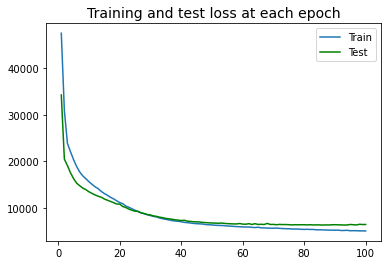

In [138]:
print_report_nn(nn, nn_history.history)

###### 2. 3 Layred NN with Regularization

**Becuse there was slight overfitting oserved hence to combat that used L1 regularization in both hidden layers**

In [139]:
nn2 = models.Sequential()
nn2.add(layers.Dense(32, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn2.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn2.add(layers.Dense(1, activation='relu'))

nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

print(nn2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                5024      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
None


In [140]:
nn2_history = nn2.fit(X_train.astype('float'),
                  y_train.astype('int'),
                  epochs=100,
                  batch_size=128,
                  validation_split = 0.1)

Epoch 1/100
22/22 [==============================] - 0s 14ms/step - loss: 50506.2305 - mean_squared_error: 50503.5508 - val_loss: 42682.7578 - val_mean_squared_error: 42680.0781
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 49008.2852 - mean_squared_error: 49005.5898 - val_loss: 40659.1992 - val_mean_squared_error: 40656.4805
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 46174.8711 - mean_squared_error: 46172.1055 - val_loss: 37324.3125 - val_mean_squared_error: 37321.4922
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 41907.3086 - mean_squared_error: 41904.4180 - val_loss: 32740.5938 - val_mean_squared_error: 32737.5957
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 36474.0977 - mean_squared_error: 36470.9844 - val_loss: 27499.5898 - val_mean_squared_error: 27496.3398
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 30833.3789 - mean_squared_error: 30829.99

22/22 [==============================] - 0s 3ms/step - loss: 11812.0215 - mean_squared_error: 11805.7842 - val_loss: 11092.5000 - val_mean_squared_error: 11086.2373
Epoch 48/100
22/22 [==============================] - 0s 3ms/step - loss: 11597.5879 - mean_squared_error: 11591.2930 - val_loss: 10938.1318 - val_mean_squared_error: 10931.8125
Epoch 49/100
22/22 [==============================] - 0s 3ms/step - loss: 11372.2178 - mean_squared_error: 11365.8789 - val_loss: 10756.9307 - val_mean_squared_error: 10750.5693
Epoch 50/100
22/22 [==============================] - 0s 3ms/step - loss: 11219.0566 - mean_squared_error: 11212.6680 - val_loss: 10603.5928 - val_mean_squared_error: 10597.1855
Epoch 51/100
22/22 [==============================] - 0s 3ms/step - loss: 11024.0850 - mean_squared_error: 11017.6533 - val_loss: 10448.3574 - val_mean_squared_error: 10441.9053
Epoch 52/100
22/22 [==============================] - 0s 3ms/step - loss: 10841.9795 - mean_squared_error: 10835.5137 - val

Epoch 94/100
22/22 [==============================] - 0s 4ms/step - loss: 6849.6836 - mean_squared_error: 6842.4702 - val_loss: 7019.9312 - val_mean_squared_error: 7012.7124
Epoch 95/100
22/22 [==============================] - 0s 4ms/step - loss: 6821.6895 - mean_squared_error: 6814.4668 - val_loss: 6996.5562 - val_mean_squared_error: 6989.3286
Epoch 96/100
22/22 [==============================] - 0s 5ms/step - loss: 6795.9150 - mean_squared_error: 6788.6846 - val_loss: 6968.2510 - val_mean_squared_error: 6961.0151
Epoch 97/100
22/22 [==============================] - 0s 4ms/step - loss: 6746.0391 - mean_squared_error: 6738.8037 - val_loss: 6955.0527 - val_mean_squared_error: 6947.8135
Epoch 98/100
22/22 [==============================] - 0s 3ms/step - loss: 6722.2446 - mean_squared_error: 6715.0059 - val_loss: 7007.6084 - val_mean_squared_error: 7000.3623
Epoch 99/100
22/22 [==============================] - 0s 4ms/step - loss: 6666.8516 - mean_squared_error: 6659.6030 - val_loss: 69

Training MAE: 49.1108
Validation MAE: 51.9789
Training MSE: 6607.8614
Validation MSE: 7371.6537
Training r2: 0.7356
Validation r2: 0.727


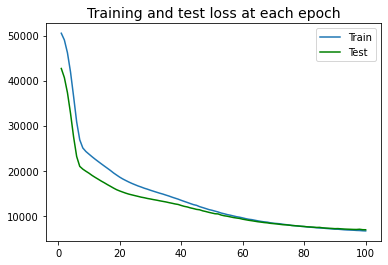

In [141]:
print_report_nn(nn2, nn2_history.history)

###### 3. 3 Layered NN with Dropout

**using regularization did work and decreased the difference of performance between training and validation set, now we tried to increase the model's coomplexity by using 64 and 32 nodes in hidden layer and used a dropout as an alternative of regularization in last model**

In [142]:
nn3 = models.Sequential()
nn3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn3.add(layers.Dropout(0.5))
nn3.add(layers.Dense(32, activation='relu'))
nn3.add(layers.Dropout(0.5))
nn3.add(layers.Dense(1, activation='relu'))

nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

print(nn3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                10048     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
nn3_history = nn3.fit(X_train.astype('float'),
                  y_train.astype('int'),
                  epochs=100,
                  batch_size=32,
                  validation_split = 0.1)

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 44869.1758 - mean_squared_error: 44869.1758 - val_loss: 25661.9316 - val_mean_squared_error: 25661.9316
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 27404.0898 - mean_squared_error: 27404.0898 - val_loss: 19184.6836 - val_mean_squared_error: 19184.6836
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 24289.7246 - mean_squared_error: 24289.7246 - val_loss: 17593.4336 - val_mean_squared_error: 17593.4336
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 23008.0664 - mean_squared_error: 23008.0664 - val_loss: 16397.1250 - val_mean_squared_error: 16397.1250
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 20896.6543 - mean_squared_error: 20896.6543 - val_loss: 15460.4248 - val_mean_squared_error: 15460.4248
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 20576.2148 - mean_squared_error: 20576.214

88/88 [==============================] - 0s 3ms/step - loss: 7667.1353 - mean_squared_error: 7667.1353 - val_loss: 6498.4229 - val_mean_squared_error: 6498.4229
Epoch 95/100
88/88 [==============================] - 0s 2ms/step - loss: 7447.2642 - mean_squared_error: 7447.2642 - val_loss: 6431.5005 - val_mean_squared_error: 6431.5005
Epoch 96/100
88/88 [==============================] - 0s 2ms/step - loss: 8436.5381 - mean_squared_error: 8436.5381 - val_loss: 6558.6094 - val_mean_squared_error: 6558.6094
Epoch 97/100
88/88 [==============================] - 0s 2ms/step - loss: 7921.0283 - mean_squared_error: 7921.0283 - val_loss: 6292.7085 - val_mean_squared_error: 6292.7085
Epoch 98/100
88/88 [==============================] - 0s 3ms/step - loss: 7866.2656 - mean_squared_error: 7866.2656 - val_loss: 6390.9697 - val_mean_squared_error: 6390.9697
Epoch 99/100
88/88 [==============================] - 0s 3ms/step - loss: 7131.7256 - mean_squared_error: 7131.7256 - val_loss: 6293.7949 - val

Training MAE: 39.8347
Validation MAE: 45.8317
Training MSE: 5001.1262
Validation MSE: 7127.426
Training r2: 0.7999
Validation r2: 0.736


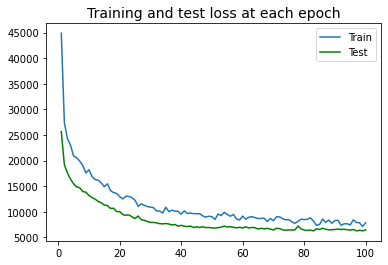

In [145]:
print_report_nn(nn3, nn3_history.history)

# Model Selection

Model's performance (training, validation)
- Linear regression = 65, 69
- Random Forest = 95, 80
- KNN = 100, 60
- XGBoost = 91, 79
- Neural Netrork
    - 1. = 79, 77
    - 2. = 74, 73
    - 3. = 80, 74
    
**Not so surprisingly, XGBoost performance on test data is more or less same both having aprox 80% performance but the reason why XGBoost is better becuse of less overfitting observed in the xgboost model as compared to Random Forest, hence our final model will be xgboost. Although 1st NN also gives a good performance but lags behing 2%. SO sticking with xgboost**

In [114]:
xgb = XGBRegressor(n_estimators = 100, max_depth = 4, 
                   booster = 'gbtree', gamma = 3, 
                   reg_lambda = 10, reg_alpha = 1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=1,
             reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
print_report(xgb)

r2:
	Training: 0.9162135929363321
	Testing: 0.7926944291376454
Mean Absolute Error:
	Training: 28.415180081547586
	Testing: 41.76229015757096
Mean Squaered Error:
	Training: 2093.6753527339843
	Testing: 5596.8742919834895


In [118]:
price_test_pred = pd.Series(xgb.predict(test_new.values)).astype('int').astype('str')

In [119]:
price_test_pred_string = '$' + price_test_pred + '.00'

In [120]:
submission_df = pd.concat([test_id, price_test_pred_string], axis = 1)

In [121]:
submission_df.columns = ['id', 'price']

In [122]:
submission_df.head()

,id,price
0,392779,$109.00
1,12456183,$78.00
2,1851863,$110.00
3,23309878,$157.00
4,10768347,$62.00


In [123]:
submission_df.to_excel('AirBnB_test_pred.xlsx', index = False)

In [124]:
pd.read_excel('AirBnB_test_pred.xlsx')

,id,price
0,392779,$109.00
1,12456183,$78.00
2,1851863,$110.00
3,23309878,$157.00
4,10768347,$62.00
...,...,...
1729,19350610,$117.00
1730,7886656,$104.00
1731,3535171,$112.00
1732,27930170,$117.00
